<a href="https://colab.research.google.com/gist/Praveenkumar1801/c912d2eb9c0224149c9e5a50d4ab9366/case_study_01_capital_bike_rentalshare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Importing and Loading python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [ ]:
##Importing CSV files into the Co-lab
data = pd.read_csv("Case_Study.csv")
data.head()

,year,month,day,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
0,2016,10,1,0,80,1,fall,18.33,65.0,100.0,6.0,0.0,30.1,0.0,0.0,3,103
1,2016,10,1,1,53,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,63
2,2016,10,1,2,27,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,33
3,2016,10,1,3,20,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.1,0.0,3,23
4,2016,10,1,4,11,1,fall,17.78,64.0,100.0,9.0,0.0,30.1,0.0,0.0,3,11


In [ ]:
## Checking data type and errors
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17466 entries, 0 to 17465
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         17466 non-null  int64  
 1   month        17466 non-null  int64  
 2   day          17466 non-null  int64  
 3   hour         17466 non-null  int64  
 4   member       17466 non-null  int64  
 5   weekend      17466 non-null  int64  
 6   season       17466 non-null  object 
 7   temperature  17466 non-null  float64
 8   dewpoint     17466 non-null  float64
 9   humidity     17466 non-null  float64
 10  windspeed    17466 non-null  float64
 11  windgust     17466 non-null  float64
 12  pressure     17466 non-null  float64
 13  precip       17466 non-null  float64
 14  precipaccum  17466 non-null  float64
 15  weather      17466 non-null  int64  
 16  rental       17466 non-null  int64  
dtypes: float64(8), int64(8), object(1)
memory usage: 2.3+ MB


,year,month,day,hour,member,weekend,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
count,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000
mean,2017.246822,6.522902,15.704569,11.518321,317.602657,0.287759,15.557475,47.166089,65.172028,8.811951,3.095630,30.047717,0.003403,0.003845,1.774820,420.144910
std,0.662303,3.451445,8.791244,6.921848,315.397551,0.452731,9.794618,19.570545,19.549624,5.104676,8.664425,0.390741,0.029175,0.065460,0.703245,402.473513
min,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-12.780000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2017.000000,4.000000,8.000000,6.000000,63.000000,0.000000,7.780000,32.000000,49.000000,6.000000,0.000000,29.900000,0.000000,0.000000,1.000000,77.000000
50%,2017.000000,7.000000,16.000000,12.000000,244.000000,0.000000,16.670000,50.000000,66.000000,8.000000,0.000000,30.000000,0.000000,0.000000,2.000000,315.500000
75%,2018.000000,10.000000,23.000000,18.000000,455.750000,1.000000,23.890000,64.310000,82.000000,12.000000,0.000000,30.200000,0.000000,0.000000,2.000000,634.000000
max,2018.000000,12.000000,31.000000,23.000000,1639.000000,1.000000,36.110000,80.000000,100.000000,44.000000,59.000000,30.800000,1.320000,4.000000,4.000000,2038.000000


**Its a clear evidence that we have 17466 rows and 17 columns and we don't have any error or missing values, Hence we don't need to do any preprocessing, it was already cleaned and ready for analysis**

In [ ]:
##creating new dataframe so that we will have raw data
df = pd.DataFrame(data)
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17466 entries, 0 to 17465
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         17466 non-null  int64  
 1   month        17466 non-null  int64  
 2   day          17466 non-null  int64  
 3   hour         17466 non-null  int64  
 4   member       17466 non-null  int64  
 5   weekend      17466 non-null  int64  
 6   season       17466 non-null  object 
 7   temperature  17466 non-null  float64
 8   dewpoint     17466 non-null  float64
 9   humidity     17466 non-null  float64
 10  windspeed    17466 non-null  float64
 11  windgust     17466 non-null  float64
 12  pressure     17466 non-null  float64
 13  precip       17466 non-null  float64
 14  precipaccum  17466 non-null  float64
 15  weather      17466 non-null  int64  
 16  rental       17466 non-null  int64  
dtypes: float64(8), int64(8), object(1)
memory usage: 2.3+ MB


,year,month,day,hour,member,weekend,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
count,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000
mean,2017.246822,6.522902,15.704569,11.518321,317.602657,0.287759,15.557475,47.166089,65.172028,8.811951,3.095630,30.047717,0.003403,0.003845,1.774820,420.144910
std,0.662303,3.451445,8.791244,6.921848,315.397551,0.452731,9.794618,19.570545,19.549624,5.104676,8.664425,0.390741,0.029175,0.065460,0.703245,402.473513
min,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-12.780000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2017.000000,4.000000,8.000000,6.000000,63.000000,0.000000,7.780000,32.000000,49.000000,6.000000,0.000000,29.900000,0.000000,0.000000,1.000000,77.000000
50%,2017.000000,7.000000,16.000000,12.000000,244.000000,0.000000,16.670000,50.000000,66.000000,8.000000,0.000000,30.000000,0.000000,0.000000,2.000000,315.500000
75%,2018.000000,10.000000,23.000000,18.000000,455.750000,1.000000,23.890000,64.310000,82.000000,12.000000,0.000000,30.200000,0.000000,0.000000,2.000000,634.000000
max,2018.000000,12.000000,31.000000,23.000000,1639.000000,1.000000,36.110000,80.000000,100.000000,44.000000,59.000000,30.800000,1.320000,4.000000,4.000000,2038.000000


In [ ]:
## Creating two new columns, one for date (combining year, month, day) and another one for date and time (combining year, month, day and hour)
df['date'] = pd.to_datetime(df[['year','month','day']])
df['date and time'] = pd.to_datetime(df[['year','month','day','hour']])
df

,year,month,day,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental,date,date and time
0,2016,10,1,0,80,1,fall,18.33,65.0,100.0,6.0,0.0,30.1,0.0,0.0,3,103,2016-10-01,2016-10-01 00:00:00
1,2016,10,1,1,53,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,63,2016-10-01,2016-10-01 01:00:00
2,2016,10,1,2,27,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,33,2016-10-01,2016-10-01 02:00:00
3,2016,10,1,3,20,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.1,0.0,3,23,2016-10-01,2016-10-01 03:00:00
4,2016,10,1,4,11,1,fall,17.78,64.0,100.0,9.0,0.0,30.1,0.0,0.0,3,11,2016-10-01,2016-10-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17461,2018,9,30,19,416,1,fall,21.67,60.0,68.0,5.0,0.0,30.3,0.0,0.0,2,541,2018-09-30,2018-09-30 19:00:00
17462,2018,9,30,20,278,1,fall,21.67,61.0,70.0,3.0,0.0,30.3,0.0,0.0,2,379,2018-09-30,2018-09-30 20:00:00
17463,2018,9,30,21,233,1,fall,21.11,62.0,76.0,6.0,0.0,30.3,0.0,0.0,2,301,2018-09-30,2018-09-30 21:00:00
17464,2018,9,30,22,148,1,fall,20.00,63.0,84.0,8.0,0.0,30.3,0.0,0.0,2,203,2018-09-30,2018-09-30 22:00:00


In [ ]:
##Moving date column into first column so that we can assume assingn them into index function
first_column =df.pop('date')
df.insert(0, 'date', first_column)
df


,date,year,month,day,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental,date and time
0,2016-10-01,2016,10,1,0,80,1,fall,18.33,65.0,100.0,6.0,0.0,30.1,0.0,0.0,3,103,2016-10-01 00:00:00
1,2016-10-01,2016,10,1,1,53,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,63,2016-10-01 01:00:00
2,2016-10-01,2016,10,1,2,27,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,33,2016-10-01 02:00:00
3,2016-10-01,2016,10,1,3,20,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.1,0.0,3,23,2016-10-01 03:00:00
4,2016-10-01,2016,10,1,4,11,1,fall,17.78,64.0,100.0,9.0,0.0,30.1,0.0,0.0,3,11,2016-10-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17461,2018-09-30,2018,9,30,19,416,1,fall,21.67,60.0,68.0,5.0,0.0,30.3,0.0,0.0,2,541,2018-09-30 19:00:00
17462,2018-09-30,2018,9,30,20,278,1,fall,21.67,61.0,70.0,3.0,0.0,30.3,0.0,0.0,2,379,2018-09-30 20:00:00
17463,2018-09-30,2018,9,30,21,233,1,fall,21.11,62.0,76.0,6.0,0.0,30.3,0.0,0.0,2,301,2018-09-30 21:00:00
17464,2018-09-30,2018,9,30,22,148,1,fall,20.00,63.0,84.0,8.0,0.0,30.3,0.0,0.0,2,203,2018-09-30 22:00:00


**Data Visualization** 

The data we have for this case study was between 2016 October to 2018 September. Thus spliting them into two equal half and visualizing in bar chart

visualizing time series data

In [ ]:
## Separating data into two equal parts
## Oct 2016 to Sep 2017 - First half, Oct 2017 to Sep 2018 - Second half

##Condition to assign year number
conditions = [
    (df['year'] == 2016),
    (df['year'] == 2017) & (df['month'] <= 9),
    (df['year'] == 2017) & (df['month'] > 9),
    (df['year'] == 2018)]

##Assigning value to the above condition

values = [1,1,2,2]

##Creating new column based on above condition

df['yearnumber'] = np.select(conditions, values)
df
  

,date,year,month,day,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental,date and time,yearnumber
0,2016-10-01,2016,10,1,0,80,1,fall,18.33,65.0,100.0,6.0,0.0,30.1,0.0,0.0,3,103,2016-10-01 00:00:00,1
1,2016-10-01,2016,10,1,1,53,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,63,2016-10-01 01:00:00,1
2,2016-10-01,2016,10,1,2,27,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,33,2016-10-01 02:00:00,1
3,2016-10-01,2016,10,1,3,20,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.1,0.0,3,23,2016-10-01 03:00:00,1
4,2016-10-01,2016,10,1,4,11,1,fall,17.78,64.0,100.0,9.0,0.0,30.1,0.0,0.0,3,11,2016-10-01 04:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17461,2018-09-30,2018,9,30,19,416,1,fall,21.67,60.0,68.0,5.0,0.0,30.3,0.0,0.0,2,541,2018-09-30 19:00:00,2
17462,2018-09-30,2018,9,30,20,278,1,fall,21.67,61.0,70.0,3.0,0.0,30.3,0.0,0.0,2,379,2018-09-30 20:00:00,2
17463,2018-09-30,2018,9,30,21,233,1,fall,21.11,62.0,76.0,6.0,0.0,30.3,0.0,0.0,2,301,2018-09-30 21:00:00,2
17464,2018-09-30,2018,9,30,22,148,1,fall,20.00,63.0,84.0,8.0,0.0,30.3,0.0,0.0,2,203,2018-09-30 22:00:00,2


In [ ]:
##Condition to assign Quarter number
conditions = [
    (df['year'] == 2016),
    (df['year'] == 2017) & (df['month'] <= 3),
    (df['year'] == 2017) & (df['month'] >= 4) & (df['month'] <= 6),
    (df['year'] == 2017) & (df['month'] >= 7) & (df['month'] <= 9),
    (df['year'] == 2017) & (df['month'] >= 10),
    (df['year'] == 2018) & (df['month'] <= 3),
    (df['year'] == 2018) & (df['month'] >= 4)& (df['month'] <= 6),
    (df['year'] == 2018) & (df['month'] >= 7)]

##Assigning value to the above condition

values = ["2016 Q4","2017 Q1","2017 Q2","2017 Q3","2017 Q4","2018 Q1","2018 Q2","2018 Q3"]

##Creating new column based on above condition

df['quarter'] = np.select(conditions, values)
df

,date,year,month,day,hour,member,weekend,season,temperature,dewpoint,...,windspeed,windgust,pressure,precip,precipaccum,weather,rental,date and time,yearnumber,quarter
0,2016-10-01,2016,10,1,0,80,1,fall,18.33,65.0,...,6.0,0.0,30.1,0.0,0.0,3,103,2016-10-01 00:00:00,1,2016 Q4
1,2016-10-01,2016,10,1,1,53,1,fall,17.78,64.0,...,10.0,0.0,30.1,0.0,0.0,3,63,2016-10-01 01:00:00,1,2016 Q4
2,2016-10-01,2016,10,1,2,27,1,fall,17.78,64.0,...,10.0,0.0,30.1,0.0,0.0,3,33,2016-10-01 02:00:00,1,2016 Q4
3,2016-10-01,2016,10,1,3,20,1,fall,17.78,64.0,...,10.0,0.0,30.1,0.1,0.0,3,23,2016-10-01 03:00:00,1,2016 Q4
4,2016-10-01,2016,10,1,4,11,1,fall,17.78,64.0,...,9.0,0.0,30.1,0.0,0.0,3,11,2016-10-01 04:00:00,1,2016 Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17461,2018-09-30,2018,9,30,19,416,1,fall,21.67,60.0,...,5.0,0.0,30.3,0.0,0.0,2,541,2018-09-30 19:00:00,2,2018 Q3
17462,2018-09-30,2018,9,30,20,278,1,fall,21.67,61.0,...,3.0,0.0,30.3,0.0,0.0,2,379,2018-09-30 20:00:00,2,2018 Q3
17463,2018-09-30,2018,9,30,21,233,1,fall,21.11,62.0,...,6.0,0.0,30.3,0.0,0.0,2,301,2018-09-30 21:00:00,2,2018 Q3
17464,2018-09-30,2018,9,30,22,148,1,fall,20.00,63.0,...,8.0,0.0,30.3,0.0,0.0,2,203,2018-09-30 22:00:00,2,2018 Q3


yearnumber
1    3710934
2    3627317
Name: rental, dtype: int64 yearnumber
1    2731360
2    2815888
Name: member, dtype: int64 yearnumber
1    979574
2    811429
Name: non-member, dtype: int64


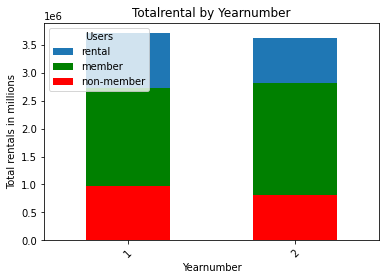

<Figure size 432x288 with 0 Axes>

In [ ]:
##Comparing number of rental between 1st year and second year
df["non-member"]=df["rental"]-df["member"]
Totalrental_by_everyone = df.groupby("yearnumber")["rental"].sum()
Totalrental_by_member = df.groupby("yearnumber")["member"].sum()
Totalrental_by_nonmember = df.groupby("yearnumber")["non-member"].sum()
print(Totalrental_by_everyone,Totalrental_by_member,Totalrental_by_nonmember)
Totalrental_by_everyone.plot(kind="bar", title = "Totalrental by Yearnumber",rot ='45')
Totalrental_by_member.plot(kind="bar",rot ='45',color='g',linestyle='--')
Totalrental_by_nonmember.plot(kind="bar",rot ='45',color='r',linestyle='--')
plt.xlabel("Yearnumber")
plt.ylabel("Total rentals in millions")
plt.legend(loc='upper left',title='Users')
plt.show()
plt.savefig('Totalrental_by_Yearnumber.png')

quarter
2016 Q4     771006
2017 Q1     646462
2017 Q2    1104396
2017 Q3    1189070
2017 Q4     815149
2018 Q1     589926
2018 Q2    1095200
2018 Q3    1127042
Name: rental, dtype: int64


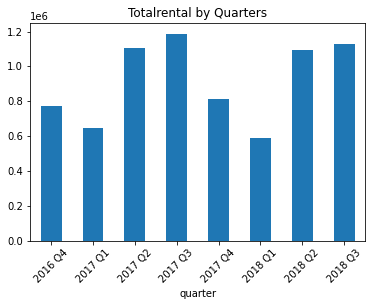

In [ ]:
##Comparing number of rental between quarters
Totalrental_by_everyone = df.groupby("quarter")["rental"].sum()
print(Totalrental_by_everyone)
Totalrental_by_everyone.plot(kind="bar", title = "Totalrental by Quarters", x ="Yearnumber", y = "Total rental in millions", rot ='45')
plt.show()

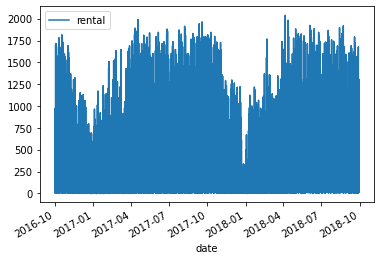

In [ ]:
##Adding line chart 
df.plot(x="date",y="rental",kind="line")
plt.show()

quarter
2016 Q4     771006
2017 Q1     646462
2017 Q2    1104396
2017 Q3    1189070
2017 Q4     815149
2018 Q1     589926
2018 Q2    1095200
2018 Q3    1127042
Name: rental, dtype: int64 quarter
2016 Q4    616531
2017 Q1    528389
2017 Q2    763376
2017 Q3    823064
2017 Q4    658871
2018 Q1    496882
2018 Q2    800338
2018 Q3    859797
Name: member, dtype: int64 quarter
2016 Q4    154475
2017 Q1    118073
2017 Q2    341020
2017 Q3    366006
2017 Q4    156278
2018 Q1     93044
2018 Q2    294862
2018 Q3    267245
Name: non-member, dtype: int64


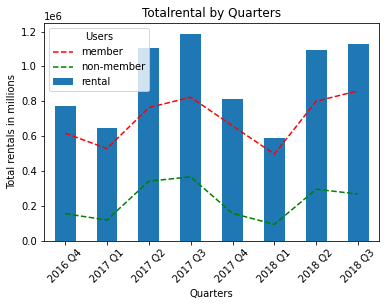

In [ ]:
##Comparing rental, members & non-members
df["non-member"]=df["rental"]-df["member"]
Totalrental_by_everyone = df.groupby("quarter")["rental"].sum()
Totalrental_by_member = df.groupby("quarter")["member"].sum()
Totalrental_by_nonmember = df.groupby("quarter")["non-member"].sum()
print(Totalrental_by_everyone,Totalrental_by_member,Totalrental_by_nonmember)
Totalrental_by_everyone.plot(kind="bar", title = "Totalrental by Quarters",rot ='45')
Totalrental_by_member.plot(kind="line",rot ='45',color='r',linestyle='--')
Totalrental_by_nonmember.plot(kind="line",rot ='45',color='g',linestyle='--')
plt.xlabel("Quarters")
plt.ylabel("Total rentals in millions")
plt.legend(loc='upper left',title='Users')
plt.show()

season
fall      1956360
spring    1892861
summer    2390450
winter    1098580
Name: rental, dtype: int64 season
fall      1520215
spring    1372615
summer    1702106
winter     952312
Name: member, dtype: int64 season
fall      436145
spring    520246
summer    688344
winter    146268
Name: non-member, dtype: int64


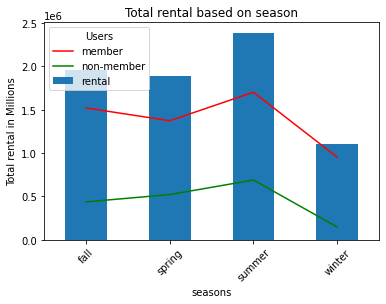

In [ ]:
##Comparing rentals saeson basis
Totalrental_by_everyone = df.groupby("season")["rental"].sum()
Totalrental_by_member = df.groupby("season")["member"].sum()
Totalrental_by_nonmember = df.groupby("season")["non-member"].sum()
print(Totalrental_by_everyone,Totalrental_by_member,Totalrental_by_nonmember)
Totalrental_by_everyone.plot(kind="bar", title = "Total rental based on season",rot ='45')
Totalrental_by_member.plot(kind="line",rot ='45',color='r')
Totalrental_by_nonmember.plot(kind="line",rot ='45',color='g')
plt.xlabel("seasons")
plt.ylabel("Total rental in Millions")
plt.legend(loc='upper left',title='Users')
plt.show()

month
1     343394
2     408681
3     484313
4     694865
5     713683
6     791048
7     801988
8     797414
9     716710
10    728010
11    511640
12    346505
Name: rental, dtype: int64 month
1     304525
2     342826
3     377920
4     481027
5     513668
6     569019
7     551792
8     581295
9     549774
10    553125
11    417316
12    304961
Name: member, dtype: int64 month
1      38869
2      65855
3     106393
4     213838
5     200015
6     222029
7     250196
8     216119
9     166936
10    174885
11     94324
12     41544
Name: non-member, dtype: int64


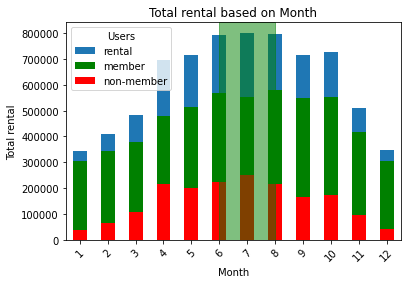

In [ ]:
##Comparing rentals monthly basis
Totalrental_by_everyone = df.groupby("month")["rental"].sum()
Totalrental_by_member = df.groupby("month")["member"].sum()
Totalrental_by_nonmember = df.groupby("month")["non-member"].sum()
Totalrental_by_everyone.plot(kind="bar", title = "Total rental based on Month",rot ='45')
Totalrental_by_member.plot(kind="bar",rot ='45',color='g')
Totalrental_by_nonmember.plot(kind="bar",rot ='45',color='r')
print(Totalrental_by_everyone,Totalrental_by_member,Totalrental_by_nonmember)
plt.xlabel("Month")
plt.ylabel("Total rental")
plt.axvspan(5, 7, color='green', alpha=0.5)
plt.legend(loc='upper left',title='Users')
plt.show()

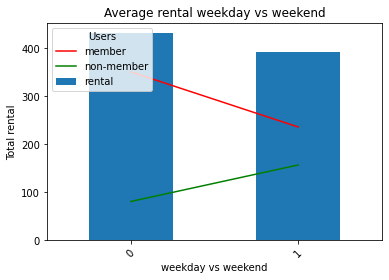

In [ ]:
##Comparing weekday and weekend rental - Trying to understand the customers by taking average
Totalrental_by_everyone = df.groupby("weekend")["rental"].mean()
Totalrental_by_member = df.groupby("weekend")["member"].mean()
Totalrental_by_nonmember = df.groupby("weekend")["non-member"].mean()
Totalrental_by_everyone.plot(kind="bar", title = "Average rental weekday vs weekend",rot ='45')
Totalrental_by_member.plot(kind="line",rot ='45',color='r')
Totalrental_by_nonmember.plot(kind="line",rot ='45',color='g')
plt.xlabel("weekday vs weekend")
plt.ylabel("Total rental")
plt.legend(loc='upper left',title='Users')
plt.show()

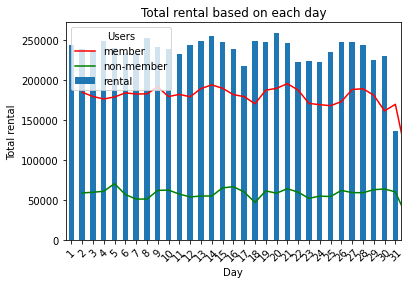

In [ ]:
##Comparing on day to day basis
Totalrental_by_everyone = df.groupby("day")["rental"].sum()
Totalrental_by_member = df.groupby("day")["member"].sum()
Totalrental_by_nonmember = df.groupby("day")["non-member"].sum()
Totalrental_by_everyone.plot(kind="bar", title = "Total rental based on each day",rot ='45')
Totalrental_by_member.plot(kind="line",rot ='45',color='r')
Totalrental_by_nonmember.plot(kind="line",rot ='45',color='g')
plt.xlabel("Day")
plt.ylabel("Total rental")
plt.legend(loc='upper left',title='Users')
plt.show()

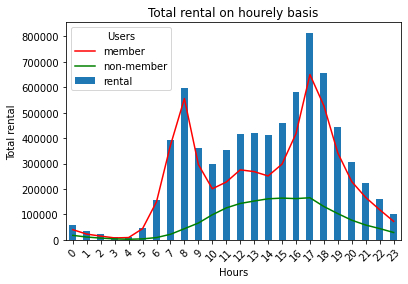

In [ ]:
##comparing on hourely basis
Totalrental_by_everyone = df.groupby("hour")["rental"].sum()
Totalrental_by_member = df.groupby("hour")["member"].sum()
Totalrental_by_nonmember = df.groupby("hour")["non-member"].sum()
Totalrental_by_everyone.plot(kind="bar", title = "Total rental on hourely basis",rot ='45')
Totalrental_by_member.plot(kind="line",rot ='45',color='r')
Totalrental_by_nonmember.plot(kind="line",rot ='45',color='g')
plt.xlabel("Hours")
plt.ylabel("Total rental")
plt.legend(loc='upper left',title='Users')
plt.show()

### Comman factors affecting the usage of bike 
Comparing bike usage along with the temperature, dewpoint, humidity, windspeed, windgust, pressure, prep, precipaccum, weather

In [ ]:
##checking the common factors
df.loc[:,['temperature','dewpoint',	'humidity',	'windspeed','windgust',	'pressure',	'precip','precipaccum','weather']].describe()

,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather
count,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000
mean,15.557475,47.166089,65.172028,8.811951,3.095630,30.047717,0.003403,0.003845,1.774820
std,9.794618,19.570545,19.549624,5.104676,8.664425,0.390741,0.029175,0.065460,0.703245
min,-12.780000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.780000,32.000000,49.000000,6.000000,0.000000,29.900000,0.000000,0.000000,1.000000
50%,16.670000,50.000000,66.000000,8.000000,0.000000,30.000000,0.000000,0.000000,2.000000
75%,23.890000,64.310000,82.000000,12.000000,0.000000,30.200000,0.000000,0.000000,2.000000
max,36.110000,80.000000,100.000000,44.000000,59.000000,30.800000,1.320000,4.000000,4.000000


     temperature  rental
0         -12.78       5
1         -12.22      83
2         -11.67     108
3         -11.11      17
4         -10.56    1740
..           ...     ...
485        35.00   11640
486        35.19    1234
487        35.56    6200
488        35.83     622
489        36.11    3756

[490 rows x 2 columns]


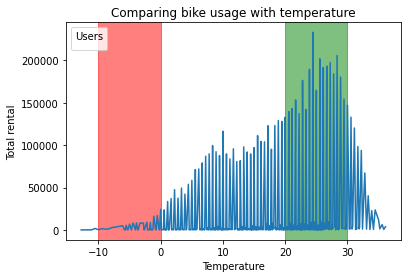

In [ ]:
##Comparing rental with the temperature
Totalrental_by_everyone = df.groupby("temperature")["rental"].sum().reset_index()
print(Totalrental_by_everyone)
plt.plot(Totalrental_by_everyone['temperature'],Totalrental_by_everyone['rental'])
plt.title("Comparing bike usage with temperature")
plt.xlabel("Temperature")
plt.ylabel("Total rental")
plt.axvspan(20, 30, color='green', alpha=0.5)
plt.axvspan(-10, 0, color='red', alpha=0.5)
plt.legend(loc='upper left',title='Users')
plt.show()


     dewpoint  rental
0        0.00    4440
1        1.00   10410
2        2.00   10514
3        3.00   10323
4        4.00    8885
..        ...     ...
456     78.00    5280
457     78.50     818
458     78.67    1234
459     79.00    2400
460     80.00    2412

[461 rows x 2 columns]


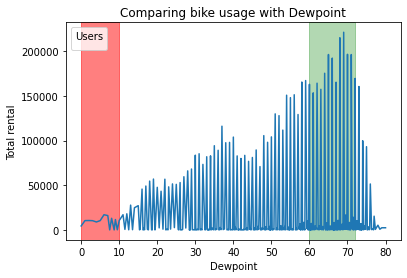

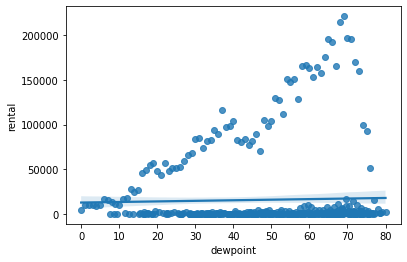

In [ ]:
##Comparing dew point with usage
Totalrental_by_everyone = df.groupby("dewpoint")["rental"].sum().reset_index()
print(Totalrental_by_everyone)
plt.plot(Totalrental_by_everyone['dewpoint'],Totalrental_by_everyone['rental'])
plt.title("Comparing bike usage with Dewpoint")
plt.xlabel("Dewpoint")
plt.ylabel("Total rental")
plt.axvspan(60, 72, color='green', alpha=0.3)
plt.axvspan(0, 10, color='red', alpha=0.5)
plt.legend(loc='upper left',title='Users')
plt.show()

sns.regplot(x=Totalrental_by_everyone['dewpoint'],y=Totalrental_by_everyone['rental'],data=Totalrental_by_everyone,)

     humidity  rental
0       13.00    2365
1       14.00    2953
2       15.00    8548
3       16.00   10409
4       17.00    6384
..        ...     ...
403     99.33     144
404     99.40     201
405     99.50     257
406     99.67      47
407    100.00   42384

[408 rows x 2 columns]


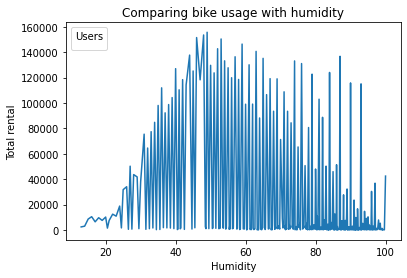

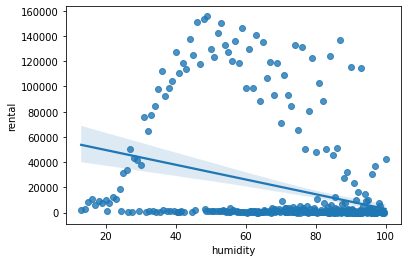

In [ ]:
##Comparing humidity with usage
Totalrental_by_everyone = df.groupby("humidity")["rental"].sum().reset_index()
print(Totalrental_by_everyone)
plt.plot(Totalrental_by_everyone['humidity'],Totalrental_by_everyone['rental'])
plt.title("Comparing bike usage with humidity")
plt.xlabel("Humidity")
plt.ylabel("Total rental")
plt.legend(loc='upper left',title='Users')
plt.show()

sns.regplot(x=Totalrental_by_everyone['humidity'],y=Totalrental_by_everyone['rental'],data=Totalrental_by_everyone,)

     windspeed  rental
0         0.00  370189
1         0.50     209
2         0.60    1678
3         0.75     108
4         1.00    3273
..         ...     ...
281      37.00     405
282      37.67     199
283      39.00     217
284      40.00     200
285      44.00     188

[286 rows x 2 columns]


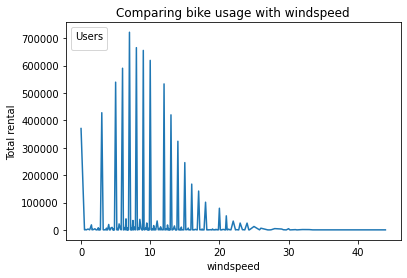

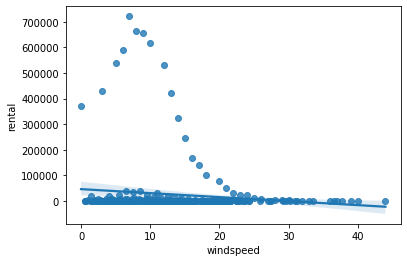

In [ ]:
##Comparing windspeed with usage
Totalrental_by_everyone = df.groupby("windspeed")["rental"].sum().reset_index()
print(Totalrental_by_everyone)
plt.plot(Totalrental_by_everyone['windspeed'],Totalrental_by_everyone['rental'])
plt.title("Comparing bike usage with windspeed")
plt.xlabel("windspeed")
plt.ylabel("Total rental")
plt.legend(loc='upper left',title='Users')
plt.show()

sns.regplot(x=Totalrental_by_everyone['windspeed'],y=Totalrental_by_everyone['rental'],data=Totalrental_by_everyone,)

     windgust   rental
0        0.00  6369423
1        2.00       30
2        2.33      561
3        2.44      164
4        3.33      187
..        ...      ...
186     53.67      199
187     55.00      159
188     56.50      176
189     58.00      337
190     59.00      754

[191 rows x 2 columns]


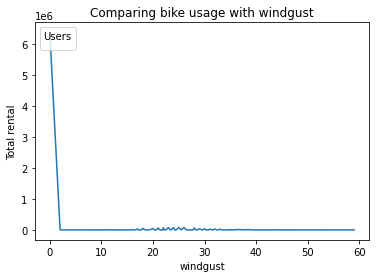

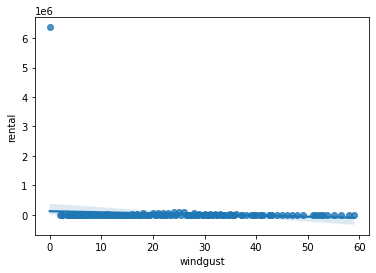

In [ ]:
##Comparing windgust with usage
Totalrental_by_everyone = df.groupby("windgust")["rental"].sum().reset_index()
print(Totalrental_by_everyone)
plt.plot(Totalrental_by_everyone['windgust'],Totalrental_by_everyone['rental'])
plt.title("Comparing bike usage with windgust")
plt.xlabel("windgust")
plt.ylabel("Total rental")
plt.legend(loc='upper left',title='Users')
plt.show()

sns.regplot(x=Totalrental_by_everyone['windgust'],y=Totalrental_by_everyone['rental'],data=Totalrental_by_everyone,)

    pressure  rental
0       0.00     713
1      29.20     322
2      29.23      36
3      29.24      97
4      29.25      18
..       ...     ...
81     30.55     189
82     30.60   57780
83     30.67       4
84     30.70   19905
85     30.80    4431

[86 rows x 2 columns]


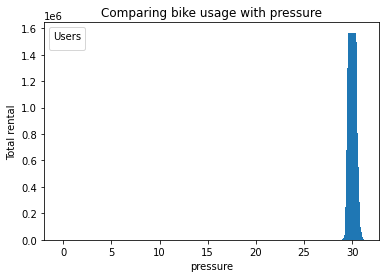

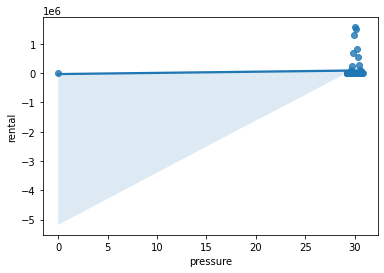

In [ ]:
##comparing usage with pressure
Totalrental_by_everyone = df.groupby("pressure")["rental"].sum().reset_index()
print(Totalrental_by_everyone)
plt.bar(Totalrental_by_everyone['pressure'],Totalrental_by_everyone['rental'])
plt.title("Comparing bike usage with pressure")
plt.xlabel("pressure")
plt.ylabel("Total rental")
plt.legend(loc='upper left',title='Users')
plt.show()

sns.regplot(x=Totalrental_by_everyone['pressure'],y=Totalrental_by_everyone['rental'],data=Totalrental_by_everyone,)


    precip   rental
0     0.00  7255833
1     0.01      584
2     0.02     4450
3     0.03     5036
4     0.04     1095
5     0.05     8273
6     0.06     2589
7     0.07     9216
8     0.08     3939
9     0.09      823
10    0.10    22893
11    0.11      690
12    0.12     1634
13    0.13      893
14    0.14     2016
15    0.15     1519
16    0.16      384
17    0.17      890
18    0.18      173
19    0.19      168
20    0.20     3419
21    0.21       97
22    0.22     1055
23    0.23      101
24    0.24      498
25    0.25      448
26    0.26       47
27    0.27      131
28    0.28      955
29    0.30     1095
30    0.31      206
31    0.32      440
32    0.33       37
33    0.34       82
34    0.35      367
35    0.38      265
36    0.40     1701
37    0.45      256
38    0.53      419
39    0.55      518
40    0.57      166
41    0.60      541
42    0.62      204
43    0.68      196
44    0.70      752
45    0.80      648
46    1.30       67
47    1.32      442


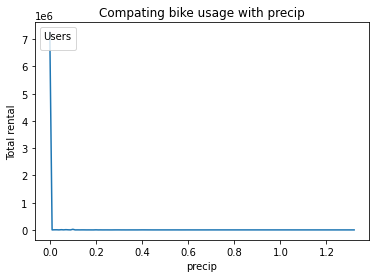

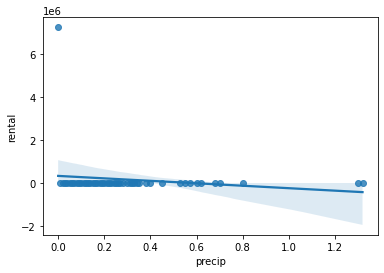

In [ ]:
##comparing usage with precip
Totalrental_by_everyone = df.groupby("precip")["rental"].sum().reset_index()
print(Totalrental_by_everyone)
plt.plot(Totalrental_by_everyone['precip'],Totalrental_by_everyone['rental'])
plt.title("Comparing bike usage with precip")
plt.xlabel("precip")
plt.ylabel("Total rental")
plt.legend(loc='upper left',title='Users')
plt.show()

sns.regplot(x=Totalrental_by_everyone['precip'],y=Totalrental_by_everyone['rental'],data=Totalrental_by_everyone,)

    precipaccum   rental
0          0.00  7228150
1          0.02     2452
2          0.03     1714
3          0.05    10526
4          0.07     1895
5          0.08      901
6          0.10    28436
7          0.11      663
8          0.12      442
9          0.13      489
10         0.15      442
11         0.17     1228
12         0.18       86
13         0.20    10872
14         0.23      963
15         0.25      228
16         0.30     8917
17         0.33     1158
18         0.35      410
19         0.36       20
20         0.40     2821
21         0.50     6547
22         0.60      272
23         0.65     1289
24         0.70     2325
25         0.75       91
26         0.80     2745
27         0.90     3775
28         0.97      348
29         1.00     2786
30         1.10     3417
31         1.20     2726
32         1.40     1989
33         1.50     1409
34         1.60     2200
35         1.90      248
36         2.50     1418
37         2.80     1501
38         4.00      352


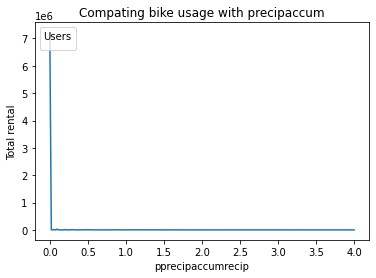

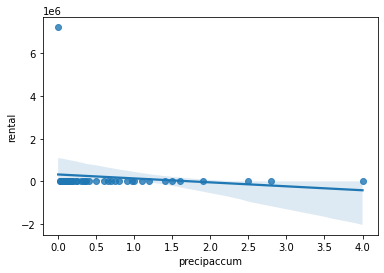

In [ ]:
##comparing usage with precipaccum
Totalrental_by_everyone = df.groupby("precipaccum")["rental"].sum().reset_index()
print(Totalrental_by_everyone)
plt.plot(Totalrental_by_everyone['precipaccum'],Totalrental_by_everyone['rental'])
plt.title("Comparing bike usage with precipaccum")
plt.xlabel("precipaccumrecip")
plt.ylabel("Total rental")
plt.legend(loc='upper left',title='Users')
plt.show()

sns.regplot(x=Totalrental_by_everyone['precipaccum'],y=Totalrental_by_everyone['rental'],data=Totalrental_by_everyone,)

   weather   rental
0        1  2766157
1        2  4106012
2        3   299613
3        4   166469


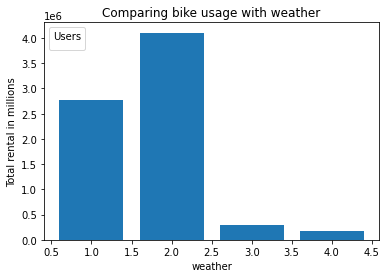

In [ ]:
##comparing usage of bike with different weather and usage
Totalrental_by_everyone = df.groupby("weather")["rental"].sum().reset_index()
print(Totalrental_by_everyone)
plt.bar(Totalrental_by_everyone['weather'],Totalrental_by_everyone['rental'])
plt.title("Comparing bike usage with weather")
plt.xlabel("weather")
plt.ylabel("Total rental in millions")
plt.legend(loc='upper left',title='Users')
plt.show()


### Predicting using machine learning algoritham
since the output is continuous variable we are using Linear regression model from Sklearn. To perform linear regression, we do have certain criteria to fullfill : 1) There shouldn't be any missing values, 2)Data should be in numeric format, 3)Data should stored in pandas dataframe or Numpy array

In [ ]:
##importing model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
##Check the data before jumping directly into the model
df.head()
df.info()

NameError: ignored

In [ ]:
##Lets convert the season column into continuous variable using dummy variables
convertedseason = pd.get_dummies(df.season)
##merge the data
df = pd.concat([df,convertedseason],axis='columns')
df

In [ ]:
##Lets convert weather column into continuous variable using dummy variables
convertedwether = pd.get_dummies(df.weather)
##Merge the data
df = pd.concat([df,convertedwether],axis='columns')
df

In [ ]:
##Lets check the data type
df.info()

In [ ]:
## rename the column name which are all in the numeric format to string format
df.rename(columns = {1:'fair',2:'cloudy',3:'drizzle',4:'haze'},inplace=True)
df.info()

In [ ]:
##Now we have all our column in numeric format, lets start with model, lets create feature and target array
df.reset_index()
X = df[["year","month","day","hour","weekend","member","temperature","dewpoint","pressure","precipaccum","spring","summer","winter","cloudy","drizzle","haze"]].values
y = df["rental"].values
print(X,y)

In [ ]:
##Lets split our data into two so that we can first verify whether our model fits to linear regression or not
from sklearn.metrics import mean_squared_error
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.3, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train,y_train)
y_predit = reg_all.predict(X_test)
r_square_value = reg_all.score(X_test,y_test)
mean_square_error = mean_squared_error(y_test,y_predit,squared=False)
print('R^2 value for this model will be',r_square_value)
print('MSE value for this model will be',mean_square_error)

Interpretation : 
Thus r-square value shows as 0.95 which indicates that our model has a accuracy of 95% so this model is good fit for our data